# TOpsPy Practical Examples

In this Notebook you can find Some Usage of TOpsPy openseespy package, availble on : https://github.com/BijanSeif/TOpsPy 

In [1]:
import topspy.dynamic as bjd
import topspy.modeling as bjm
import openseespy.opensees as ops
import eSEESminiPy as slv
import opsvis as opvis
%matplotlib notebook

def define_model():
    ops.wipe()
    ops.model('basic', '-ndm',3)
    
    #Nodes
    ops.node(1, *[0,0,0]);ops.fix(1,1,1,1,1,1,1)
    ops.node(2, *[0,0,4])
    ops.node(3, *[0,6,4])
    ops.node(4, *[0,6,0]);ops.fix(4,1,1,1,1,1,1)
    ops.node(5, *[0,3,2])
    
    #Geometric Transformation
    transfTag=1
    Theta=0
    vecxz=bjm.GmTVector(1,2,Theta)
    ops.geomTransf('Linear', transfTag, *vecxz)
    
    #Defining Elements
    Area=1
    E_mod=1
    G_mod=1
    Jxx=1
    Iy=1
    Iz=1

    eleTag=1
    eleNodes=[1,2]
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)

    eleTag=2
    eleNodes=[3,4]
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)

    eleTag=3
    eleNodes=[2,3]
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)

    eleTag=4
    eleNodes=[1,5]
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)

    eleTag=5
    eleNodes=[3,5]
    ops.element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag)


def analyset():
    #  Run the Static analysis

# create SOE
    ops.system("BandSPD")
# create DOF number
    ops.numberer("RCM")
# create constraint handler
    ops.constraints("Plain")
# create integrator
    ops.integrator("LoadControl", 0.1)
# create algorithm
    ops.algorithm("Linear")
# create analysis object
    ops.analysis("Static")
# perform the analysis

# ElePerPend function

This function returns a **Vector** perpendicular to the direction from first node to second node (3D space)

(1.0, 0.0, 0.0)
(1.0, 0.0, 0.0)


<IPython.core.display.Javascript object>


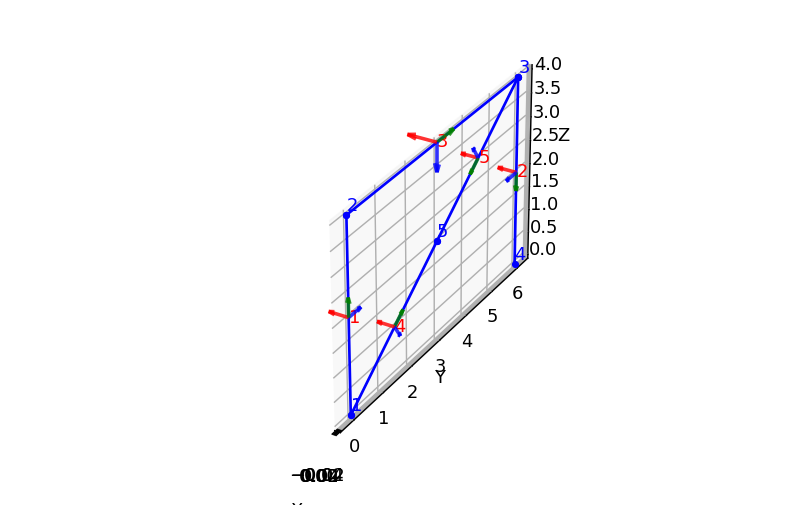

In [2]:
define_model()


#Calculate a Vector Normal to element 5 or 4 using ElePerPend:

N1=bjm.ElePerPend(1,5) #Using Node Number

print(N1)

a=ops.nodeCoord(1)    #Get Node Coordinate
b=ops.nodeCoord(5)

N2=bjm.ElePerPend(a,b) #Using Node Coordinate

print(N2)


opvis.plot_model()

### Results:

N1=(1.0, 0.0, 0.0)
N2=(1.0, 0.0, 0.0)

it can be seen that the resulted vector is normal to the Y-Z plane that model is drawn, Also the vector is perpendicular to the line that started from Node1 and ended to Node 5

# eleAxialForce

This function returns axial First Node and End Node axial force of the element.

<IPython.core.display.Javascript object>


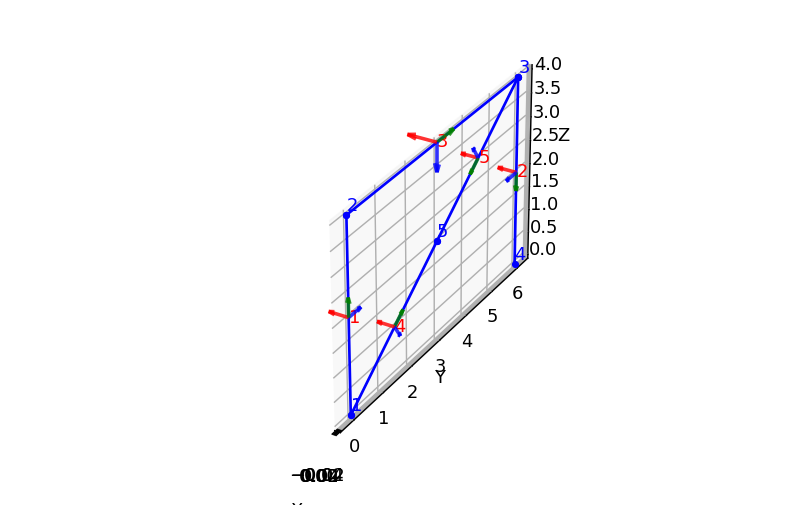

For Element 1 First Node Global Forces is = [0.0, -26.268745687617034, -14.543454224645293]
And the Axial Forces at the start and the end of the element 1 is equal = (-14.543454224645293, 14.543454224645293)

------------

For Element 4 First Node Global Forces is = [-1.0415429139246171e-30, -31.096833977878006, -20.448086255440412]
And the Axial Forces at the start and the end of the element 4 is equal = (-37.21668732259166, 37.21668732259166)


In [3]:
define_model()

opvis.plot_model()

# Define A Concentrated Force at node 3 and Analyze
tsTag=1
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, 1)
ops.load(3, 0, 1000.0, 0.0,0,0,0)
analyset()
ops.analyze(1)

#Get Element Forces and Get Gement Axial Forces
eleTag = 1
force = ops.eleForce(eleTag)
print (f'For Element {eleTag} First Node Global Forces is = {force[0:3]}')

Axial1,Axial2=bjm.eleAxialForce(eleTag)
print(f'And the Axial Forces at the start and the end of the element {eleTag} is equal = {Axial1,Axial2}')

print('\n------------\n')
eleTag = 4
force = ops.eleForce(eleTag)
print (f'For Element {eleTag} First Node Global Forces is = {force[0:3]}')

Axial1,Axial2=bjm.eleAxialForce(eleTag)
print(f'And the Axial Forces at the start and the end of the element {eleTag} is equal = {Axial1,Axial2}')


# GmTVector

For this Function visit: https://github.com/BijanSeif/My-Opensees-Jupyter-NoteBooks 

# MultiEl

A function for define each number of elements along defined nodes.

**For end Continues:**

<IPython.core.display.Javascript object>


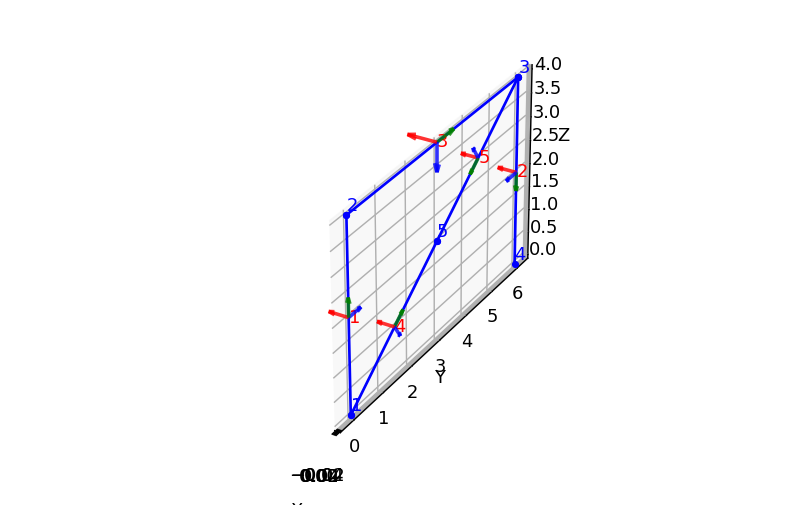

Results: [List of middle nodes, list of middle nodes corresponding coordinates] :

([450], [[0.0, 4.5, 1.0]])

([250, 251], [[0.0, 1.0, 3.3333333333333335], [0.0, 2.0, 2.666666666666667]])


<IPython.core.display.Javascript object>


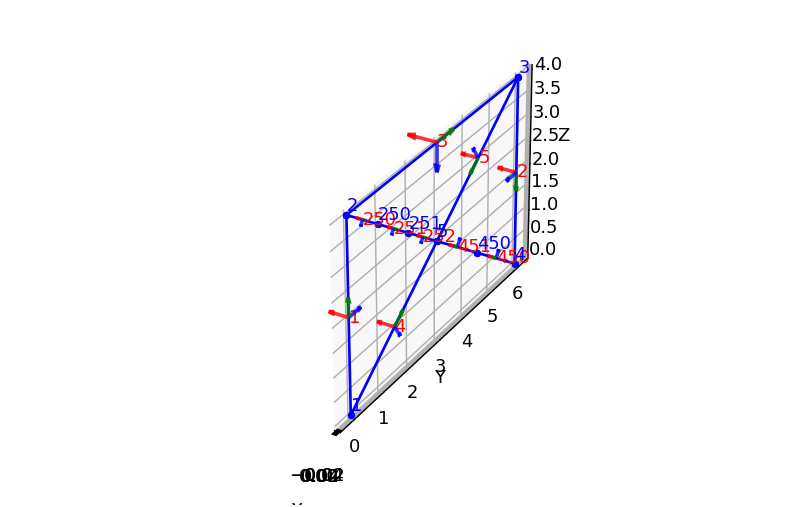

In [4]:
#WITH END FIX
define_model()

opvis.plot_model() #Draw The Model


# Define Our Element Properties
Area=1
E_mod=1
G_mod=1
Jxx=1
Iy=1
Iz=1

#Define openseespy Element properties in a list
transfTag=1
eleTag=3            # This value will be ignore among generation elements
eleNodes=[2,3]      # These values will be ignore among generation elements
elep=['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag]

# print(help(bjm.MultiEl))

rslt=bjm.MultiEl(4,5,2,elep) #Define 2 elements with elep properties from node 4 to node 5
print('Results: [List of middle nodes, list of middle nodes corresponding coordinates] :')
print()
print(rslt)

# Or we can write:

rslt=bjm.MultiEl(2,5,3,['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag])
#That Defines 3 elements with elep properties from node 2 to node 5
print()
print(rslt)


opvis.plot_model()

**For 2End Pinned Heads:**

<IPython.core.display.Javascript object>


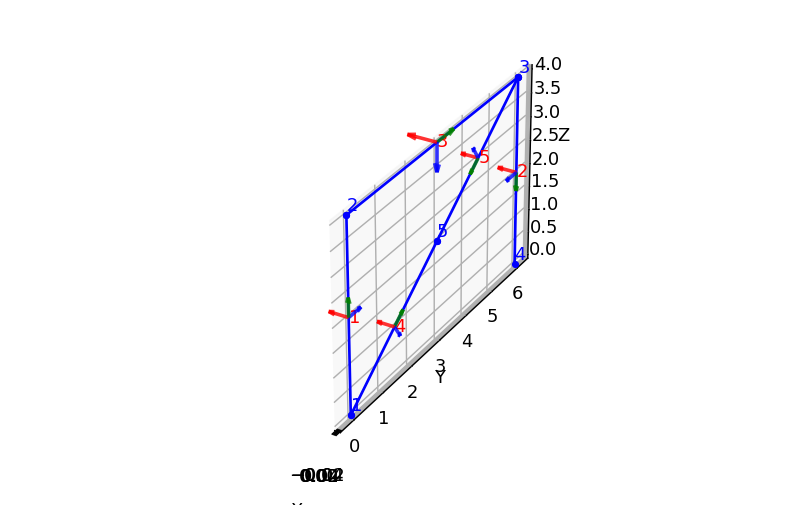

Results: [List of middle nodes, list of middle nodes corresponding coordinates] :

([451], [[0.0, 4.5, 1.0]])

([251, 252], [[0.0, 1.0, 3.3333333333333335], [0.0, 2.0, 2.666666666666667]])


MapOfTaggedObjects::addComponent - not adding as one with similar tag exists, tag: 1
ERROR could not add uniaaialMaterial.


<IPython.core.display.Javascript object>


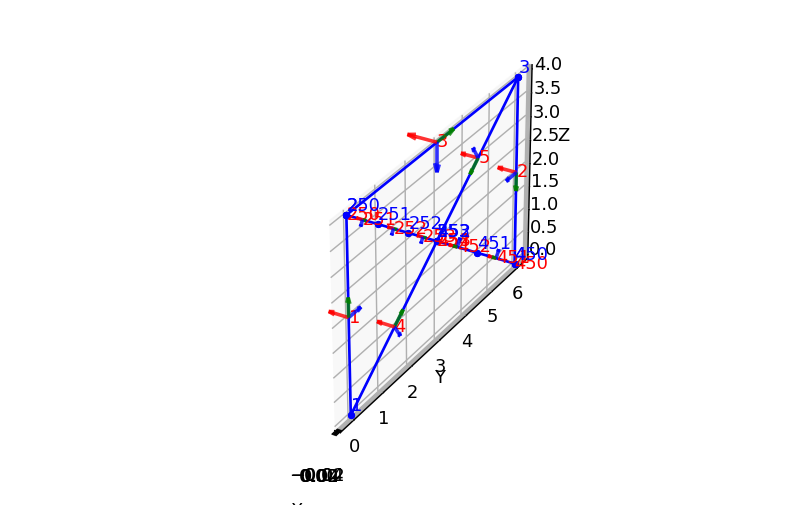

In [5]:
#With ENd Released feature
define_model()

opvis.plot_model() #Draw The Model


# Define Our Element Properties
Area=1
E_mod=1
G_mod=1
Jxx=1
Iy=1
Iz=1

#Define openseespy Element properties in a list
transfTag=1
eleTag=3            # This value will be ignore among generation elements
eleNodes=[2,3]      # These values will be ignore among generation elements
elep=['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag]

# print(help(bjm.MultiEl))

rslt=bjm.MultiEl(4,5,2,elep,0,'Yes',1e9,1) #Define 2 elements with elep properties from node 4 to node 5
print('Results: [List of middle nodes, list of middle nodes corresponding coordinates] :')
print()
print(rslt)

# Or we can write:

rslt=bjm.MultiEl(2,5,3,['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag],0,'Yes',1e9,1)
#That Defines 3 elements with elep properties from node 2 to node 5
print()
print(rslt)


opvis.plot_model()

**For above example with initial Buckling Shape1:** (For better watching on the plots, The center Curve Value has been given by a big number [0.5 and 0.25] Rotate the shape to find better view)

<IPython.core.display.Javascript object>


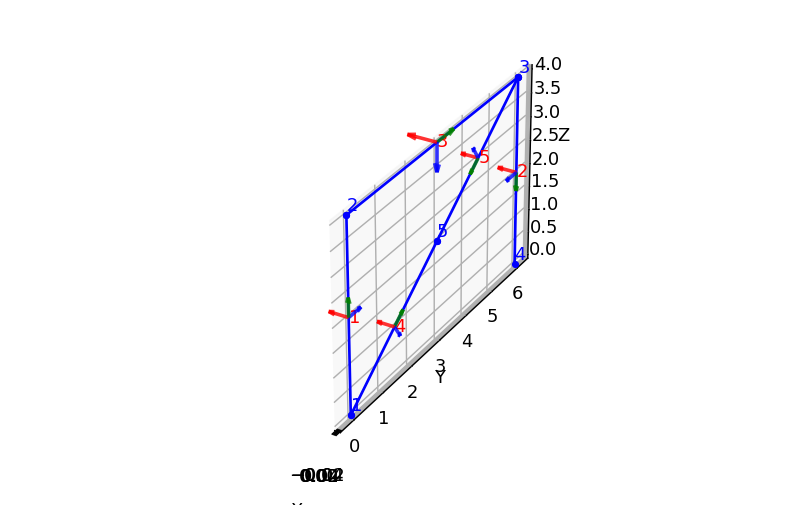

Results: [List of middle nodes, list of middle nodes corresponding coordinates] :

([452], [[-0.5, 4.5, 1.0]])

([252, 253], [[0.25, 1.2, 3.2], [0.25, 1.7999999999999998, 2.8000000000000003]])


MapOfTaggedObjects::addComponent - not adding as one with similar tag exists, tag: 1
ERROR could not add uniaaialMaterial.


<IPython.core.display.Javascript object>


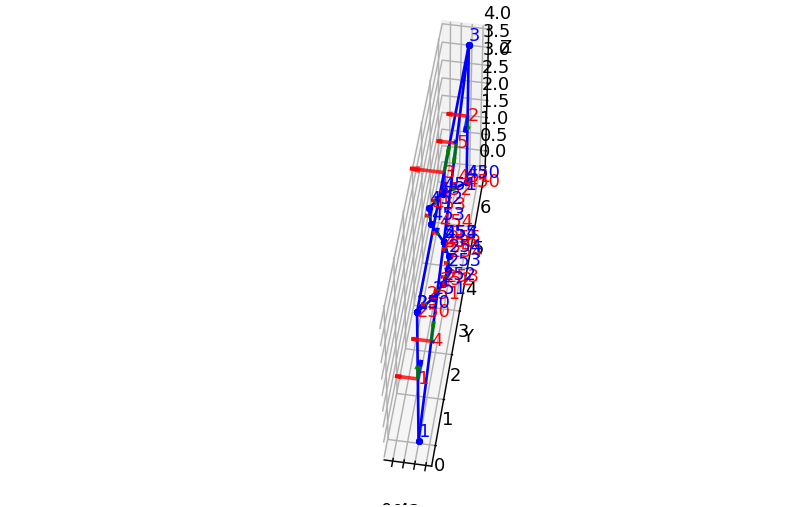

In [6]:
#With ENd Released feature
define_model()

opvis.plot_model() #Draw The Model


# Define Our Element Properties
Area=1
E_mod=1
G_mod=1
Jxx=1
Iy=1
Iz=1

#Define openseespy Element properties in a list
transfTag=1
eleTag=3            # This value will be ignore among generation elements
eleNodes=[2,3]      # These values will be ignore among generation elements
elep=['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag]

# print(help(bjm.MultiEl))

rslt=bjm.MultiEl(4,5,4,elep,0.5,'Yes',1e9,1) #Define 2 elements with elep properties from node 4 to node 5
print('Results: [List of middle nodes, list of middle nodes corresponding coordinates] :')
print()
print(rslt)

# Or we can write:

rslt=bjm.MultiEl(2,5,5,['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag],0.25,'Yes',1e9,1)
#That Defines 3 elements with elep properties from node 2 to node 5
print()
print(rslt)


opvis.plot_model()

**For 2End Pinned Heads:(With MultiElEQDOF)**

In this command Pinned condition are Produced using EQUALDOF Function

<IPython.core.display.Javascript object>


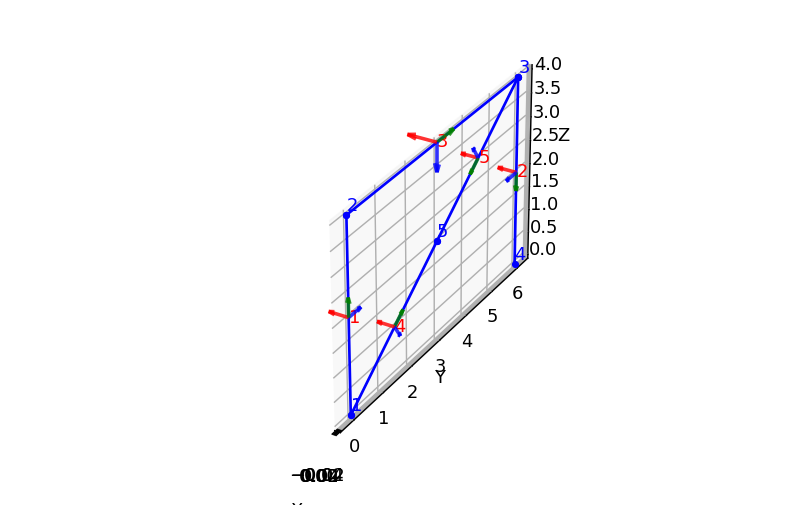

Results: [List of middle nodes, list of middle nodes corresponding coordinates] :

([451], [[0.0, 4.5, 1.0]])

([251, 252], [[0.0, 1.0, 3.3333333333333335], [0.0, 2.0, 2.666666666666667]])


<IPython.core.display.Javascript object>


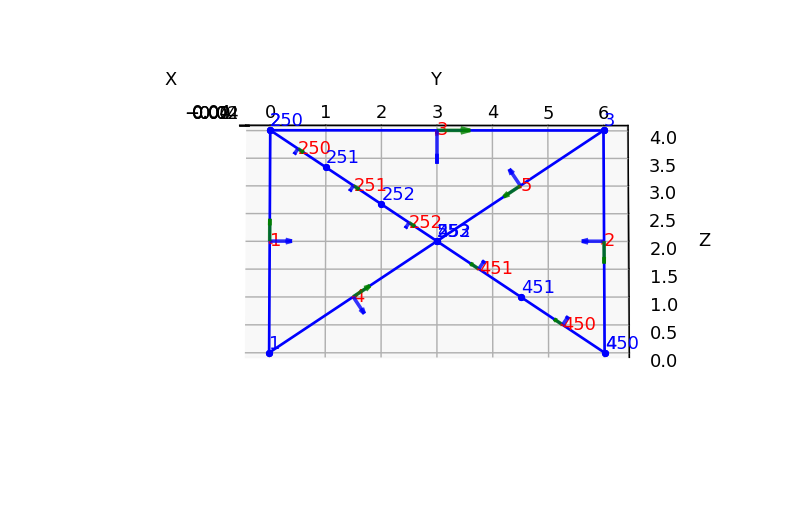

In [7]:
#With ENd Released feature
define_model()

opvis.plot_model() #Draw The Model


# Define Our Element Properties
Area=1
E_mod=1
G_mod=1
Jxx=1
Iy=1
Iz=1

#Define openseespy Element properties in a list
transfTag=1
eleTag=3            # This value will be ignore among generation elements
eleNodes=[2,3]      # These values will be ignore among generation elements
elep=['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag]

# print(help(bjm.MultiEl))

rslt=bjm.MultiElEQDOF(4,5,2,elep,0,'Yes') #Define 2 elements with elep properties from node 4 to node 5
print('Results: [List of middle nodes, list of middle nodes corresponding coordinates] :')
print()
print(rslt)

# Or we can write:

rslt=bjm.MultiElEQDOF(2,5,3,['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag],0,'Yes')
#That Defines 3 elements with elep properties from node 2 to node 5
print()
print(rslt)


opvis.plot_model()

**For above example with initial Buckling Shape:** 

(For better watching on the plots, The center Curve Value has been given by a big number [0.5 and 0.25] Rotate the shape to find better view)

<IPython.core.display.Javascript object>


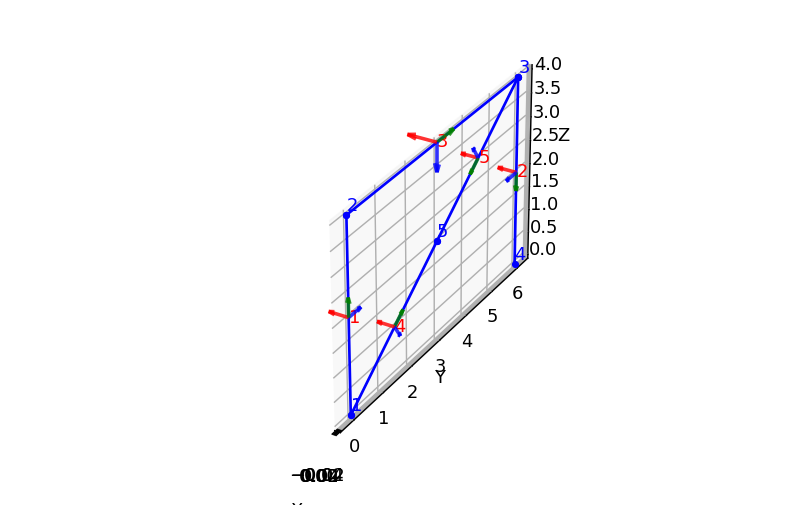

Results: [List of middle nodes, list of middle nodes corresponding coordinates] :

([452], [[-0.5, 4.5, 1.0]])

([252, 253], [[0.25, 1.2, 3.2], [0.25, 1.7999999999999998, 2.8000000000000003]])


<IPython.core.display.Javascript object>


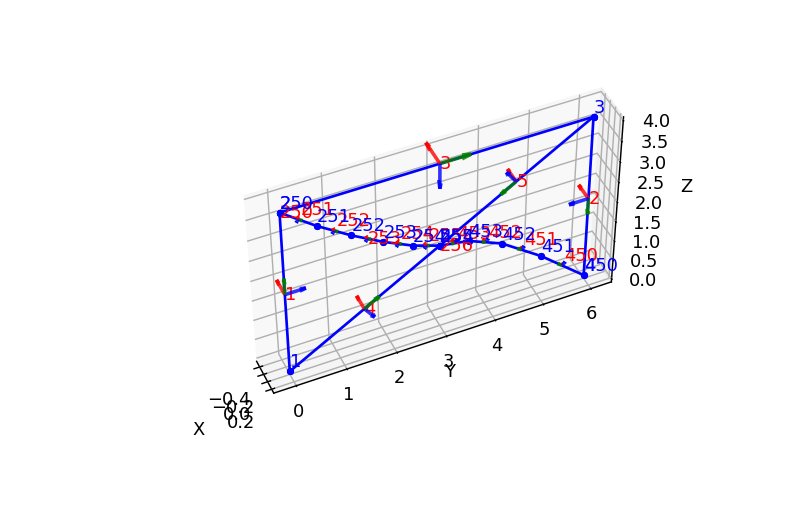

In [8]:
#With ENd Released feature
define_model()

opvis.plot_model() #Draw The Model


# Define Our Element Properties
Area=1
E_mod=1
G_mod=1
Jxx=1
Iy=1
Iz=1

#Define openseespy Element properties in a list
transfTag=1
eleTag=3            # This value will be ignore among generation elements
eleNodes=[2,3]      # These values will be ignore among generation elements
elep=['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag]

# print(help(bjm.MultiEl))

rslt=bjm.MultiElEQDOF(4,5,4,elep,0.5,'Yes') #Define 2 elements with elep properties from node 4 to node 5
print('Results: [List of middle nodes, list of middle nodes corresponding coordinates] :')
print()
print(rslt)

# Or we can write:

rslt=bjm.MultiEl(2,5,5,['elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, G_mod, Jxx, Iy, Iz, transfTag],0.25,'Yes')
#That Defines 3 elements with elep properties from node 2 to node 5
print()
print(rslt)


opvis.plot_model()